In [2]:
from pathlib import Path

import pydicom 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file('C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/ID_0000_AGE_0060_CONTRAST_1_CT.dcm')  # read single dicom file

In [4]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        VR.UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1

In [5]:
print(dicom_file[0x0028, 0x0010])
print(dicom_file[0x0028, 0x0011])
print(dicom_file[0x0018, 0x0015])

(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0018, 0015) Body Part Examined                  CS: 'CHEST'


In [6]:
print('Rows: ', dicom_file.Rows)
print('Columns: ', dicom_file.Columns)
print('Body Part Examined: ', dicom_file.BodyPartExamined)

Rows:  512
Columns:  512
Body Part Examined:  CHEST


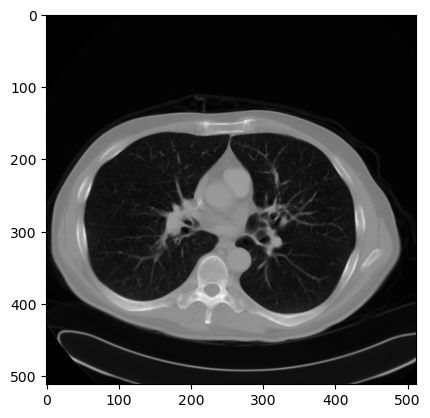

In [18]:
ct = dicom_file.pixel_array # load the image pixel data as a numpy array
plt.figure()
plt.imshow(ct, cmap="gray")

In [8]:
path_to_head_mri = Path("C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/")

In [9]:
print(ct.shape)

(512, 512)


In [10]:
all_files = list(path_to_head_mri.glob("*"))  # as glob returns a generator, we convert it to a list

In [11]:
all_files

[WindowsPath('C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/MR000000'),
 WindowsPath('C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/MR000001'),
 WindowsPath('C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/MR000002'),
 WindowsPath('C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/MR000003'),
 WindowsPath('C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/MR000004'),
 WindowsPath('C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/MR000005'),
 WindowsPath('C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/MR000006'),
 WindowsPath('C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/MR000007'),
 WindowsPath('C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/MR000008'),
 WindowsPath('C:/Users/Owner/Downloads/Udemy/P

In [12]:
mri_data = []

for path in all_files:
    data = pydicom.read_file(path) # read the single DICOM files
    mri_data.append(data)
print(len(mri_data))

27


In [13]:
### unordered slices ###
for slice in mri_data[:5]: # just show the first 5 slices
    print(slice.SliceLocation) # this is the location of the within the scanner coordinate system

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [14]:
# this sorts the slices according to their location
mri_data_ordered = sorted(mri_data, key=lambda slice: slice.SliceLocation) 

### Ordered slices ###
for slice in mri_data_ordered[:5]:
    print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [15]:
full_volume = []
for slice in mri_data_ordered:
    full_volume.append(slice.pixel_array) # fill the 3D array in a slice-per-slice manner
full_volume = np.array(full_volume)
print(full_volume.shape)

(27, 256, 256)


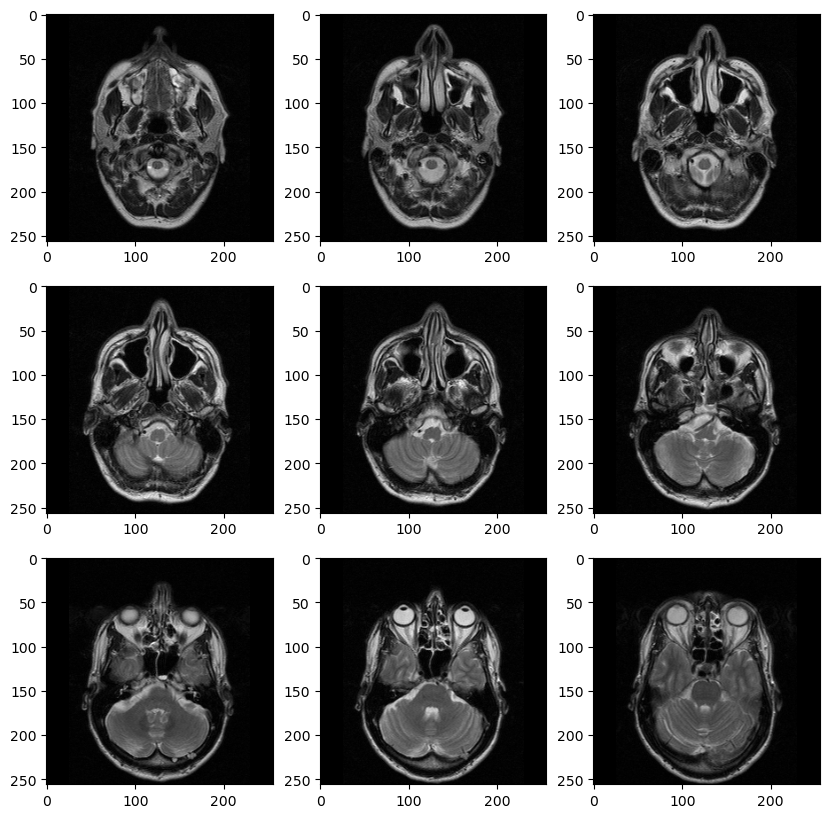

In [16]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[slice_counter], cmap="gray")
        slice_counter+=1

In [17]:
import SimpleITK as sitk

ModuleNotFoundError: No module named 'SimpleITK'